# 1.0 - data exploration

I was highly inspired by [this work](https://medium.com/stanford-cs224w/recommender-systems-with-gnns-in-pyg-d8301178e377) and mostly everything I had to do was to adapt the code to myself.

Moreover, as guys above have implemented two different models, I could use the same preprocessing to train my model in the same scenario.


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing as pp

In [2]:
columns_name = ["user_id", "item_id", "rating", "timestamp"]
df = pd.read_csv("../data/raw/ml-100k/u.data", sep="\t", names=columns_name)
print(len(df))

df.head(5)

100000


,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


### See uniques ratings

<Axes: title={'center': 'Ratings present'}, xlabel='rating'>

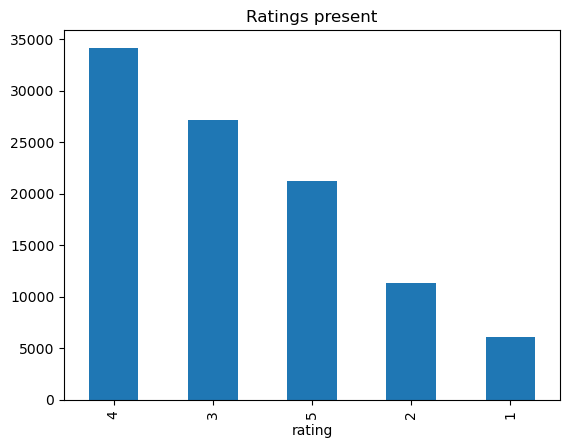

In [3]:
df["rating"].value_counts().plot(kind="bar", title="Ratings present")

### Well, but how many users and films do we have?

In [4]:
df["user_id"].nunique(), df["item_id"].nunique()

(943, 1682)

## Graph

So if we were to take the whole graph, there would be 943 + 1682 nodes with 100000 edges.


## Data splitting

In order to prepare data, we would split it into 80-20 train-test with static seed and save it for further evaluation.

In [5]:
train, test = train_test_split(df.values, test_size=0.2, random_state=69)  # nice
train_df = pd.DataFrame(train, columns=df.columns)
test_df = pd.DataFrame(test, columns=df.columns)

What has happened?

- we have splitted data into train and test
- some of users and items present in train could be absent in test
- thus, we have to relabel all the users and items using `LabelEncoder` in order to have continuous ids


In [6]:
# now we have to relable the user_id and item_id to be sequential
le_user = pp.LabelEncoder()
le_item = pp.LabelEncoder()

train_df["user_id_idx"] = le_user.fit_transform(train_df["user_id"].values)
train_df["item_id_idx"] = le_item.fit_transform(train_df["item_id"].values)

train_user_ids = train_df["user_id"].unique()
train_item_ids = train_df["item_id"].unique()

test_df = test_df[
    (test_df["user_id"].isin(train_user_ids))
    & (test_df["item_id"].isin(train_item_ids))
]

test_df["user_id_idx"] = le_user.transform(test_df["user_id"].values)
test_df["item_id_idx"] = le_item.transform(test_df["item_id"].values)

# user_id and item_id are obsolete now and can be dropped
train_df.drop(["user_id", "item_id"], axis=1, inplace=True)
test_df.drop(["user_id", "item_id"], axis=1, inplace=True)

train_df.head(5)

,rating,timestamp,user_id_idx,item_id_idx
0,3,887080905,575,275
1,4,891464148,829,691
2,5,879456334,526,179
3,4,879376967,869,9
4,4,879442377,803,654


In [7]:
# save to csv
train_df.to_csv("../data/interim/train.csv", index=False)
test_df.to_csv("../data/interim/test.csv", index=False)